In [1]:
# import the necessary libraries required for data manipulation and Visulaization
import pandas as pd  # For Data Handling
import seaborn as sns # Visualization Library
import numpy as np  # For Numerical Computaions
import matplotlib.pyplot as plt  # Visualization Library

## 1. Importing dataset

In [2]:
# import the train dataset
df = pd.read_csv("train_product_data.csv")  
# pandas read_csv function is used to import the required data and convert it into a dataframe

## 2. Understanding the dataset

In [3]:
# Checking the data 
df.head() # Fetching only first 5 rows as higher computation is required as you fetch the entire dataset 

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [4]:
# Checking the no. of rows and columns of the data
df.shape

(14999, 15)

**There are 15 features and 14999 rows present in the dataset**

In [5]:
# Checking the descriptive analysis of the numerical features of the data
df.describe()

,retail_price,discounted_price
count,14942.000000,14942.000000
mean,3128.424040,2087.732298
std,9154.463342,7712.247869
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1000.000000,499.000000
75%,1989.750000,999.000000
max,571230.000000,571230.000000


In [6]:
# Name of the features present in the dataset
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:
# Checking the missing value count
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

**It can be seen that some of the features have missing values.**  
**Description has 1 missing value and some other columns have more than 1 missing values.**

In [8]:
# Checking the unique values present in every feature
df.nunique()

uniq_id                    14999
crawl_timestamp              246
product_url                14999
product_name                9345
product_category_tree         14
pid                        14997
retail_price                1846
discounted_price            2032
image                      13762
is_FK_Advantage_product        2
description                13163
product_rating                36
overall_rating                36
brand                       2311
product_specifications     14082
dtype: int64

In [9]:
# Checking the datatypes and the non-null value count of the respective features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

**The need is to predict the category of the product by using the description.**  
**So it can be said that description is the independent feature and product category is the dependent feature.**  
**We need to use a classification model as we are dealing with non-continuous & non-numerical features.**

## 3. Performing Exploratory Data analysis

<Axes: xlabel='product_category_tree'>

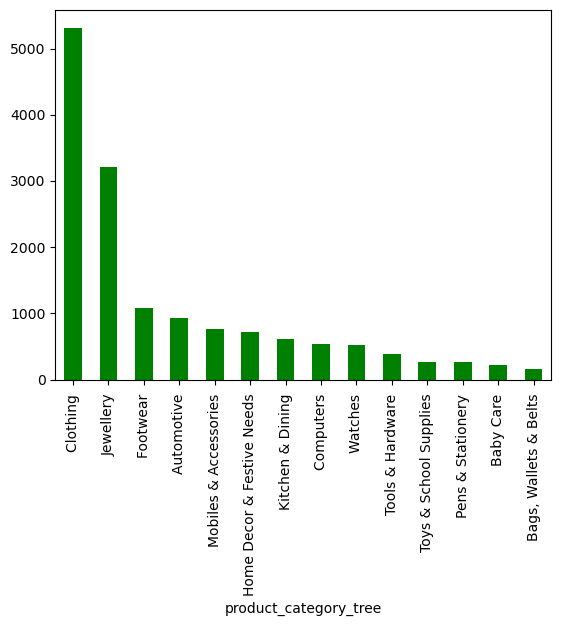

In [10]:
# Plotting the bar graph to understand different product categories
df["product_category_tree"].value_counts().plot(kind="bar",fontsize=10, color="green")

**It can be seen that Clothing and Jewellery are more dominant categories which indicate that the customers preferred**
**these 2 categories more than other categories. There can be multiple reasons for this like:**
   - 1. Better collection  
   - 2. Exotic offers & Discounts  
   - 3. Faster delivery  
   - 4. Easy Exchange
   

In [11]:
# Visualization for the independent feature

**As description is a text column and we are going to predict based on the words present in the description feature, the best way we can visualize it is by using a word cloud.**

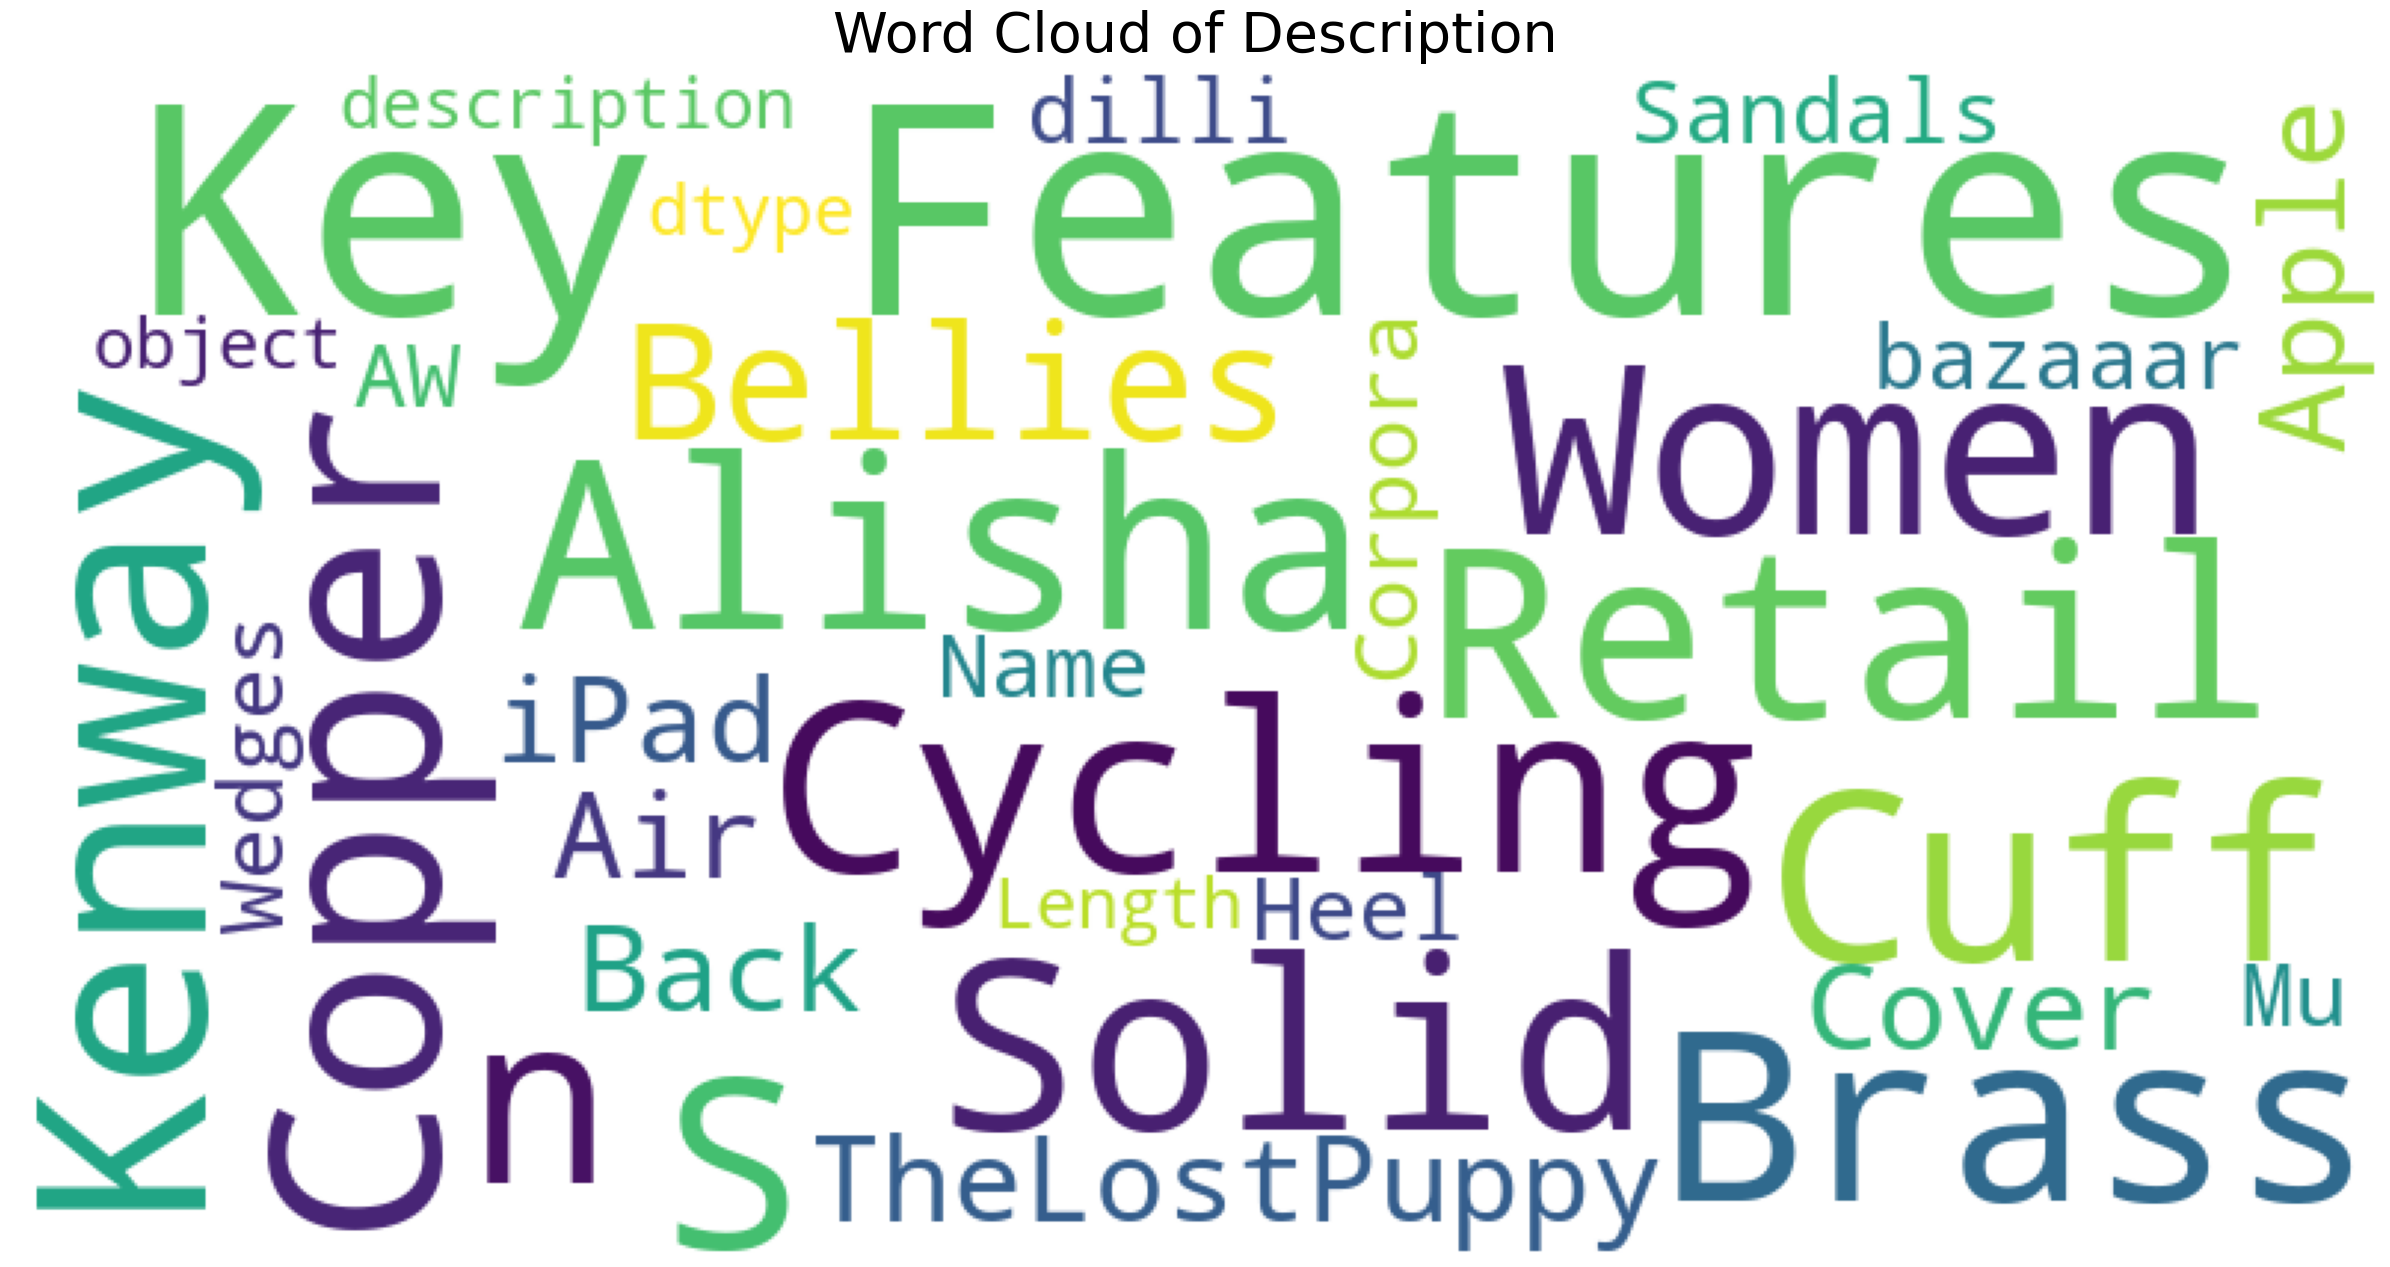

In [12]:
# Import the necessary libraries for creating word clouds and stopping words
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator

# Define a function named 'plot_wordcloud' that takes several parameters
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0, 16.0), 
                   title=None, title_size=40, image_color=False):
    # Create a set of stopwords (common words that are not useful for the word cloud)
    stopwords = set(STOPWORDS)

    # Create a WordCloud object with specified parameters
    wordcloud = WordCloud(background_color='white',  # Background color of the word cloud
                          stopwords=stopwords,       # Stopwords to ignore
                          max_words=max_words,       # Maximum number of words in the cloud
                          max_font_size=max_font_size, # Maximum size of the words
                          random_state=42,           # Random seed for reproducibility
                          width=800,                 # Width of the word cloud image
                          height=400,                # Height of the word cloud image
                          mask=mask)                 # Optional mask image for the shape of the word cloud

    # Generate the word cloud using the text provided
    wordcloud.generate(str(text))

    # Set up the size of the figure for the word cloud
    plt.figure(figsize=figure_size)
    
    # If image_color is True, recolor the word cloud based on the mask image colors
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        # Otherwise, display the word cloud with default coloring
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 'verticalalignment': 'bottom'})

    # Remove the axis from the plot
    plt.axis('off')
    
    # Adjust the layout to make it tight
    plt.tight_layout()

# Now we call the function 'plot_wordcloud' with our dataframe's "description" column
# and give it a title "Word Cloud of Description"
plot_wordcloud(df["description"], title="Word Cloud of Description")

**It can be seen that words like "Key" and "Features" are appearing in almost every row and it does not give any significant**  
**meaning to that particular row entry. As a result it best to remove those words during data preprocessing so the model**  
**can focus on the more important words.**

# 4. Data prepocessing

**We can use the Natural Language processing(NLP) libraries to pre process the text data.**  
**Preprocessing the data using the NLP libraries can yeild more accurate results.**  


In [13]:
# Understanding the description column

In [14]:
df["description"][0] #checking the first row which is at index 0

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [15]:
# checking the length of the text
len(df["description"][0])

410

**As we already know that description has only one missing value, then we can directly drop that row as it will not affect the** **output result.**

In [16]:
df.dropna(subset="description",inplace=True) #Dropping the missing value from description column using the dropna

In [17]:
#Now checking the shape again of the data
df.shape

(14998, 15)

**Now there are only 14998 rows present as we have dropped 1 row.**

<Axes: ylabel='Frequency'>

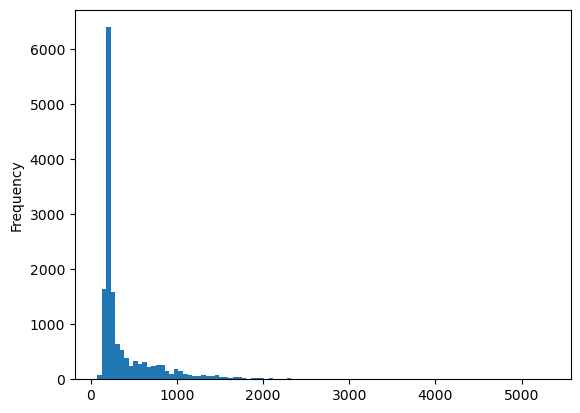

In [18]:
# checking the distribution of the length of the description column
df["description"].apply(len).plot(bins =100, kind="hist")

In [19]:
# importing the necessary NLP libraries
import nltk
from nltk import download
from nltk import word_tokenize # To create words as tokens
from nltk.stem import WordNetLemmatizer #Converting words into their pure forms using grammar
import re # For removing special and non-useful characters 

In [20]:
download(["punkt","averaged_perceptron_tagger","stopwords","wordnet"]) # Download wordnet and stopwords dictionary

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords  # importing the stopwords(non-useful words)

In [22]:
stopwords = stopwords.words("english")  # creating the stopword object for english language

In [23]:
len(stopwords)  # checking the length of the non-useful words

179

**From the wordcloud it was concluded that words like "key" and "features" are not useful.**  
**So we can remove them.**

In [24]:
stopwords.extend(["key", "features"]) # updating the stopwords list with 2 more words

In [25]:
len(stopwords) # Now agian checking the length of the list of stopwords

181

In [26]:
import string  # python's inbuilt library containing all the possible punctuations
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [27]:
lemmatizer = WordNetLemmatizer() # object of the WordNetLemmatizer class

def desp_to_words(text):  # Custom function to clean the data, converting them to tokens of their pure form
    #lowercase the test
    text = text.lower()
    #remove punctuation 
    text = re.sub(f"[{string.punctuation}]", ' ', text)
    #remove non alphanumeric occurences
    text = re.sub("[^a-z0-9]"," ", text)
    #remove the @mention
    text = re.sub("@[A-Za-z0-9_]+","", text)
    #remove the hastags
    text = re.sub("#[A-Za-z0-9_]+","", text)
    #remove any links if present
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    # Tokenize the words
    words = word_tokenize(text.lower())
    # 3. Stopwords
    meaningful_words = [w for w in words if w not in stopwords]
    # 4. Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    
    return lemmatized_words

In [28]:
check_5_rows = df["description"].head().apply(desp_to_words) # checking the first 5 preprocessed rows

In [29]:
print(check_5_rows)  # printing the first 5 rows

0    [alisha, solid, woman, cycling, short, cotton,...
1    [aw, belly, sandal, wedge, heel, casuals, aw, ...
2    [alisha, solid, woman, cycling, short, cotton,...
3    [alisha, solid, woman, cycling, short, cotton,...
4    [dilli, bazaaar, belly, corporate, casuals, ca...
Name: description, dtype: object


**Currently, we have the description as lists of tokens (also known as lemmas) and now we need to convert each of those description into a vector the SciKit Learn's algorithm models can work with.**

**Now we'll convert each product description, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.**

In [30]:
from sklearn.feature_extraction.text import CountVectorizer # importing SciKit Learn's CountVectorizer

In [31]:
# This model will convert a collection of text documents to a matrix of token counts.
bow_transformer = CountVectorizer(analyzer=desp_to_words).fit(df['description'])
print(len(bow_transformer.vocabulary_))  # form of dictionary along with the word count

18590


In [32]:
bow_transformer.vocabulary_ # checking the bag of words along with their count

{'alisha': 3979,
 'solid': 15883,
 'woman': 18238,
 'cycling': 6694,
 'short': 15495,
 'cotton': 6412,
 'lycra': 11380,
 'navy': 12406,
 'red': 14377,
 'specification': 15976,
 'detail': 7004,
 'number': 12659,
 'content': 6323,
 'sale': 14970,
 'package': 13011,
 'pack': 13010,
 '3': 1928,
 'fabric': 8180,
 'type': 17351,
 'general': 8997,
 'pattern': 13174,
 'ideal': 9875,
 'care': 5553,
 'gentle': 9007,
 'machine': 11426,
 'wash': 17977,
 'lukewarm': 11341,
 'water': 17987,
 'bleach': 4980,
 'additional': 3761,
 'style': 16348,
 'code': 6078,
 'altht': 4025,
 '3p': 2312,
 '21': 1344,
 'box': 5155,
 'aw': 4500,
 'belly': 4819,
 'sandal': 14992,
 'wedge': 18039,
 'heel': 9551,
 'casuals': 5617,
 'price': 13849,
 'r': 14146,
 '499': 2516,
 'material': 11645,
 'synthetic': 16621,
 'lifestyle': 11120,
 'casual': 5616,
 'warranty': 17975,
 'manufacturer': 11566,
 'product': 13902,
 'manufacturing': 11567,
 'defect': 6877,
 '30': 1929,
 'day': 6796,
 'instruction': 10146,
 'allow': 3994,
 

In [33]:
des_bow  = bow_transformer.transform(df["description"])  # transforming to convert it into their respective vector forms
print(des_bow)

  (0, 1344)	1
  (0, 1928)	2
  (0, 2312)	1
  (0, 3761)	1
  (0, 3979)	2
  (0, 4025)	1
  (0, 4980)	1
  (0, 5155)	1
  (0, 5553)	1
  (0, 6078)	1
  (0, 6323)	1
  (0, 6412)	2
  (0, 6694)	3
  (0, 7004)	3
  (0, 8180)	2
  (0, 8997)	1
  (0, 9007)	1
  (0, 9875)	1
  (0, 11341)	1
  (0, 11380)	2
  (0, 11426)	1
  (0, 12406)	2
  (0, 12659)	1
  (0, 13010)	1
  (0, 13011)	1
  :	:
  (14997, 6106)	2
  (14997, 6368)	5
  (14997, 6619)	3
  (14997, 6974)	2
  (14997, 7655)	2
  (14997, 8489)	8
  (14997, 9376)	2
  (14997, 9389)	2
  (14997, 10653)	1
  (14997, 11435)	4
  (14997, 12968)	2
  (14997, 13634)	2
  (14997, 13663)	2
  (14997, 13849)	1
  (14997, 14146)	1
  (14997, 14590)	1
  (14997, 14797)	2
  (14997, 14804)	2
  (14997, 15309)	2
  (14997, 16071)	2
  (14997, 16114)	2
  (14997, 16549)	4
  (14997, 17042)	2
  (14997, 18190)	4
  (14997, 18322)	2


In [34]:
type(des_bow) # checking the data type of des_bow

scipy.sparse._csr.csr_matrix

**It is a sparsity matrix.**

**We can take it further and also compute the TF-IDF score for every single row entry of description feature.**

**TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus.**

**The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.**

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer  # importing the TF-IDF transformer
tfidf_transformer=TfidfTransformer().fit(des_bow)             # fitting the transformer on the des_bow

In [36]:
des_tfidf = tfidf_transformer.transform(des_bow)  # tranforming to get the respective TF-IDF scores

In [37]:
print(des_tfidf)               # sparsity matrix along with TF-IDF score

  (0, 18238)	0.13540481517875935
  (0, 17987)	0.08705039365151698
  (0, 17977)	0.08005856126869101
  (0, 17351)	0.06114241518904958
  (0, 16348)	0.06868539873841871
  (0, 15976)	0.053542957663392864
  (0, 15883)	0.19155025350503666
  (0, 15495)	0.4621497475702851
  (0, 14970)	0.06368373318386576
  (0, 14377)	0.08121806081121719
  (0, 13174)	0.07095123409577934
  (0, 13011)	0.0626461381490312
  (0, 13010)	0.06280404990756382
  (0, 12659)	0.061278357407197094
  (0, 12406)	0.2279393531541429
  (0, 11426)	0.09619794395573318
  (0, 11380)	0.2303472458594383
  (0, 11341)	0.12260069645904986
  (0, 9875)	0.06154240942900083
  (0, 9007)	0.11215572148281425
  (0, 8997)	0.054491802212292884
  (0, 8180)	0.13184507997851325
  (0, 7004)	0.19760902353334267
  (0, 6694)	0.44166981486223245
  (0, 6412)	0.13869922757301265
  :	:
  (14997, 15309)	0.13923051825006555
  (14997, 14804)	0.1652354453083921
  (14997, 14797)	0.07148426957582016
  (14997, 14590)	0.07478188156050712
  (14997, 14146)	0.01079793012

**We have successfully converted the indpendent feature into numerical form.**
**Now let's convert dependent feature as well.**

In [38]:
# checking the number of unique classes in the product category tree feature
categories = list(df["product_category_tree"].unique())
print(categories)

['Clothing ', 'Footwear ', 'Pens & Stationery ', 'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ', 'Automotive ', 'Tools & Hardware ', 'Baby Care ', 'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ', 'Jewellery ', 'Kitchen & Dining ', 'Computers ']


In [39]:
# Define the mapping
map_list = {
    "Clothing ": 0, "Footwear ": 1, "Pens & Stationery ": 2, "Bags, Wallets & Belts ": 3,
    "Home Decor & Festive Needs ": 4, "Automotive ": 5, "Tools & Hardware ": 6,
    "Baby Care ": 7, "Mobiles & Accessories ": 8, "Watches ": 9,
    "Toys & School Supplies ": 10, "Jewellery ": 11, "Kitchen & Dining ": 12, "Computers ": 13
}

# Map the categories to integers
df['category_label'] = df["product_category_tree"].map(map_list)

In [40]:
df["product_category_tree"] = df["product_category_tree"].map(map_list)  # overwriting the feature with the numerica values

In [41]:
df.head()  # checking the first 5 values

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_label
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,0,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,1,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",1
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,0,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,0,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",1,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",...",1


## 5. Creation of model and Evaluation

**We know as it is a classification problem, we can use different classification model from SckitLearn library and evaluate them**
**using different metrices.**

In [42]:
from sklearn.model_selection import train_test_split  # importing the train_test split from SckitLearn 
# splitting the data into train and test as we need some part of unseen data to evaluate our model on.

x_train,x_test,y_train,y_test = train_test_split(df["description"],df["product_category_tree"],test_size=0.2,random_state=42, 
                                stratify = df["product_category_tree"])
    # test_size = 0.2 means 20% of our data is reserved for testing purpose                       
    # random state = 42 means that the model initiates the same split at every instance  
    # stratify maintains the same distribution of classes as in the original dataset.

In [43]:
# checking the shape of the train and test datasets
print(len(x_train),len(x_test),len(y_train),len(y_test))

11998 3000 11998 3000


In [44]:
from sklearn.naive_bayes import MultinomialNB  # classification model which uses probabilistic Bayes Theorem

In [45]:
from sklearn.pipeline import Pipeline  # Import Pipeline to create a machine learning pipeline

In [46]:
# Define a pipeline for text classification
pipeline_MultinomialNB = Pipeline([
    # Step 1: Convert text data into a bag-of-words representation
    ('des_bow', CountVectorizer(analyzer=desp_to_words)),  # Apply the custom tokenization function `desp_to_words` to the text data

    # Step 2: Convert word counts to TF-IDF values
    ('des_tfidf', TfidfTransformer()),  # Transform the bag-of-words into TF-IDF features

    # Step 3: Apply the Multinomial Naive Bayes classifier
    ('classifier', MultinomialNB()),  # Use Multinomial Naive Bayes for classification
])

# The pipeline is now ready to be used for training and predictions

In [47]:
pipeline_MultinomialNB.fit(x_train,y_train)  # fit the model pipeline on the train data

Pipeline(steps=[('des_bow',
                 CountVectorizer(analyzer=<function desp_to_words at 0x0000025CC6E61EE0>)),
                ('des_tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [48]:
predictions_NB = pipeline_MultinomialNB.predict(x_test)  # Use the trained pipeline to make predictions on the test data 

In [49]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay   # import the evaluation metrics

In [50]:
# Generates and displays a report with precision, recall, F1 score, and support for each class
print(classification_report(y_test,predictions_NB))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1063
           1       0.99      0.83      0.91       217
           2       1.00      0.21      0.34        53
           3       0.00      0.00      0.00        31
           4       0.97      0.92      0.94       143
           5       0.96      0.96      0.96       187
           6       1.00      0.84      0.91        76
           7       1.00      0.02      0.04        45
           8       0.96      0.95      0.95       154
           9       1.00      0.92      0.96       105
          10       0.83      0.09      0.17        54
          11       0.80      1.00      0.89       644
          12       1.00      0.87      0.93       122
          13       1.00      0.69      0.82       106

    accuracy                           0.90      3000
   macro avg       0.89      0.66      0.70      3000
weighted avg       0.90      0.90      0.88      3000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


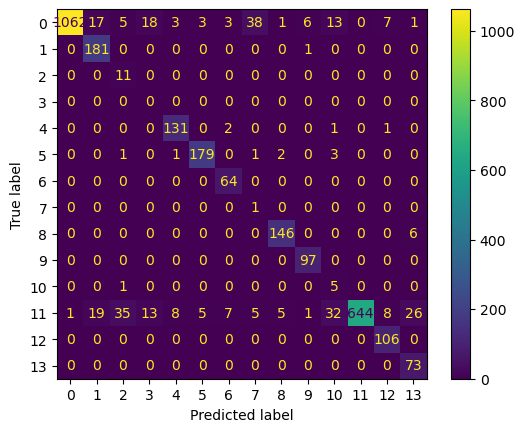

In [51]:
ConfusionMatrixDisplay(confusion_matrix(predictions_NB,y_test)).plot()  
#displays the true and predicted values for each category

### Overall Accuracy of the Multinomial Naive Bayes model is around 90% which is a good start.
### The f-1 score for category 0 and 10 is very low which needs significant improvement.

In [52]:
# Now lets try an ensemble model known as Randomforest which is a combination of multiple decision trees

In [53]:
from sklearn.ensemble import RandomForestClassifier # import the RandomForest classifier

In [54]:
# Define a pipeline for text classification
pipeline_Random_Forest = Pipeline([
    # Step 1: Convert text data into a bag-of-words representation
    ('des_bow', CountVectorizer(analyzer=desp_to_words)),  # Apply the custom tokenization function `desp_to_words` to the text data

    # Step 2: Convert word counts to TF-IDF values
    ('des_tfidf', TfidfTransformer()),  # Transform the bag-of-words into TF-IDF features

    # Step 3: Apply the Random Forest classifier
    ('classifier', RandomForestClassifier()),  # Use Random Forest for classification
])

# The pipeline is now ready to be used for training and predictions

In [55]:
pipeline_Random_Forest.fit(x_train,y_train)  # fit the model pipeline on the train data

Pipeline(steps=[('des_bow',
                 CountVectorizer(analyzer=<function desp_to_words at 0x0000025CC6E61EE0>)),
                ('des_tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [56]:
predictions_Random_Forest = pipeline_Random_Forest.predict(x_test)  
# Use the trained pipeline to make predictions on the test data 

In [57]:
# Generates and displays a report with precision, recall, F1 score, and support for each class
print(classification_report(y_test,predictions_Random_Forest))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1063
           1       0.90      0.92      0.91       217
           2       0.91      0.57      0.70        53
           3       0.96      0.71      0.81        31
           4       0.93      0.99      0.96       143
           5       0.97      1.00      0.98       187
           6       1.00      0.92      0.96        76
           7       0.96      0.58      0.72        45
           8       0.96      0.95      0.96       154
           9       1.00      0.99      1.00       105
          10       0.79      0.89      0.83        54
          11       0.99      0.99      0.99       644
          12       0.94      0.98      0.96       122
          13       0.89      0.78      0.83       106

    accuracy                           0.96      3000
   macro avg       0.94      0.88      0.90      3000
weighted avg       0.96      0.96      0.96      3000



### Overall Accuracy of the Random Forest Classifier is around 96%.
### Also the F1_score for category 3 also improved from 0 to 0.81 in this model.

**Now let's try to tune the hyperparameters of the RandomForest classifier and check if there are any improvements in the accuracy.**

In [58]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
# Define the parameter grid for GridSearchCV
parameters = {
    "classifier__max_depth": [2,3],  # Parameters for RandomForestClassifier
    "classifier__min_samples_split": [500,1000],  # Parameters for RandomForestClassifier
    "classifier__criterion": ["gini","entropy"]  # Parameters for RandomForestClassifier
  }

# Create GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(
   estimator= RandomForestClassifier,  # Pipeline object to be tuned
   param_grid=parameters,  # Dictionary specifying parameters to be tuned
   scoring="accuracy",  # Metric to evaluate model performance
   cv=5,  # Number of cross-validation folds
   n_jobs=-1  # Use all available cores for parallel processing
 )

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best parameter combination and the best score
best_parameters = grid_search.best_params_  # Best parameter combination found
best_accuracy = grid_search.best_score_  # Highest accuracy achieved

print(f"Best Parameters: {best_parameters}")  # Print the best parameter combination
print(f"Best Accuracy: {best_accuracy}")  # Print the best accuracy score


**Not able to run this on my device as the kernel is taking too long.**  
**I am not able to find any mistakes in my code.**

**If any feedback, please do share for the above code**

In [59]:
# Now let's use a Gradient Boosting algorithm as it is more powerful and advanced.

In [60]:
import xgboost as xgb  # powerful gradient boosting algorithm

In [61]:
# Define a pipeline for text classification
pipeline_xgb = Pipeline([
    # Step 1: Convert text data into a bag-of-words representation
    ('des_bow', CountVectorizer(analyzer=desp_to_words)),  # Apply the custom tokenization function `desp_to_words` to the text data

    # Step 2: Convert word counts to TF-IDF values
    ('des_tfidf', TfidfTransformer()),  # Transform the bag-of-words into TF-IDF features

    # Step 3: Apply the XGB classifier
    ('classifier', xgb.XGBClassifier()),  # Use XGB for classification
])

# The pipeline is now ready to be used for training and predictions

In [62]:
pipeline_xgb.fit(x_train,y_train)  # fit the model pipeline on the train data

Pipeline(steps=[('des_bow',
                 CountVectorizer(analyzer=<function desp_to_words at 0x0000025CC6E61EE0>)),
                ('des_tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [63]:
predictions_xgb = pipeline_Random_Forest.predict(x_test)  
# Use the trained pipeline to make predictions on the test data 

In [64]:
# Generates and displays a report with precision, recall, F1 score, and support for each class
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1063
           1       0.90      0.92      0.91       217
           2       0.91      0.57      0.70        53
           3       0.96      0.71      0.81        31
           4       0.93      0.99      0.96       143
           5       0.97      1.00      0.98       187
           6       1.00      0.92      0.96        76
           7       0.96      0.58      0.72        45
           8       0.96      0.95      0.96       154
           9       1.00      0.99      1.00       105
          10       0.79      0.89      0.83        54
          11       0.99      0.99      0.99       644
          12       0.94      0.98      0.96       122
          13       0.89      0.78      0.83       106

    accuracy                           0.96      3000
   macro avg       0.94      0.88      0.90      3000
weighted avg       0.96      0.96      0.96      3000



### XGBoost model gives the same accuracy as the RandomForestClassifier.
### It can be seen that there is no further improvement.
### So it is necessary to look for alternative approaches like Deep learning models.

In [65]:
# Now let's try a Deep learning model and check if there are any improvements

In [66]:
import tensorflow as tf   # import tenforflow library used for Deep learning models
from tensorflow import keras  
from tensorflow.keras.layers import Input,Dense  # importing the differnt layers
from tensorflow.keras.optimizers import Adam  # optimizer function

In [67]:
# Define a pipeline for text classification
pipeline_dense = Pipeline([
    # Step 1: Convert text data into a bag-of-words representation
    ('des_bow', CountVectorizer(analyzer=desp_to_words)),  # Apply the custom tokenization function `desp_to_words` to the text data

    # Step 2: Convert word counts to TF-IDF values
    ('des_tfidf', TfidfTransformer())])  # Transform the bag-of-words into TF-IDF feature

In [68]:
# fit the pipeline as the input needs to be vectorized before feeding it to the Deep learning model
pipeline_dense.fit(x_train,y_train)

Pipeline(steps=[('des_bow',
                 CountVectorizer(analyzer=<function desp_to_words at 0x0000025CC6E61EE0>)),
                ('des_tfidf', TfidfTransformer())])

In [69]:
# Transform the training and test data using the pipeline
x_train_transformed = pipeline_dense.transform(x_train)
x_test_transformed = pipeline_dense.transform(x_test)


In [70]:
from tensorflow.keras.utils import to_categorical

# Ensure the labels are in categorical format
y_train_categorical = to_categorical(y_train, num_classes=14)
y_test_categorical = to_categorical(y_test, num_classes=14)

# Define the model structure
model = keras.models.Sequential()

# Input layer and first hidden layer
model.add(keras.layers.Dense(200, input_shape=(x_train_transformed.shape[1],)))  # Dense layer with 200 neurons
model.add(keras.layers.BatchNormalization())  # Batch normalization for stabilizing learning
model.add(keras.layers.Activation('relu'))  # ReLU activation function
model.add(keras.layers.Dropout(0.5))  # Dropout to prevent overfitting (50% dropout rate)

# Second hidden layer
model.add(keras.layers.Dense(300))  # Dense layer with 300 neurons
model.add(keras.layers.BatchNormalization())  # Batch normalization
model.add(keras.layers.Activation('relu'))  # ReLU activation function
model.add(keras.layers.Dropout(0.5))  # Dropout to prevent overfitting (50% dropout rate)

# Third hidden layer
model.add(keras.layers.Dense(100, activation='relu'))  # Dense layer with 100 neurons and ReLU activation

# Output layer for multi-class classification
model.add(keras.layers.Dense(14, activation='softmax'))  
# Output layer with 14 neurons as there are total 14 product categories and softmax activation for multiclass classification

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer with adaptive learning rate
    loss='categorical_crossentropy',  # Categorical cross-entropy loss function for multi-class classification
    metrics=['accuracy']  # Metric to evaluate model performance
)

C:\Users\Shubham\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │     3,318,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │         1,414 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,412,214 (13.02 MB)

 Trainable params: 3,411,214 (13.01 MB)

 Non-trainable params: 1,000 (3.91 KB)

**There are more than 3 lakh trainable parameters.**

In [72]:
# Train the model
model.fit(x_train_transformed, y_train_categorical, epochs=10, batch_size=32)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.7171 - loss: 0.9995
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9566 - loss: 0.1402
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9795 - loss: 0.0707
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9817 - loss: 0.0580
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9894 - loss: 0.0346
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9920 - loss: 0.0286
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9877 - loss: 0.0349
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9903 - loss: 0.0378
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9916 - loss: 0.0280
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9928 - loss: 0.0220


In [73]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_transformed, y_test_categorical)
print(f'Test Accuracy: {test_accuracy:.2f}')  # Print the test accuracy

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0798
Test Accuracy: 0.98


#### It can be seen that the Deep learning model is giving the highest accuracy out of all the trained models.
#### So we must use this model to predict the product categories of the unseen data provided.

In [74]:
# Now let's test it on unseen data

In [75]:
unseen_data = pd.read_csv("test_data.csv")  # importing the unseen data

In [76]:
unseen_data.head()  # Checking the first 5 rows of unseen data

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


**The feature product_category is missing that we can predict using our model.**

In [77]:
unseen_data.shape  # shape of the unseen data

(2534, 14)

In [78]:
# Step 1: Preprocess the unseen data
unseen_data_transformed = pipeline_dense.transform(unseen_data["description"])  # Transform the unseen data using the same pipeline

# Step 2: Make predictions using the trained model
predictions = model.predict(unseen_data_transformed)  # Predict the categories for the unseen data

# Convert the predictions from one-hot encoded format back to class labels
predicted_classes = predictions.argmax(axis=1)  # Get the index of the maximum value for each prediction

# Step 3: Create a DataFrame to display descriptions and their predicted categories
unseen_data["predicted_category"] = predicted_classes  # Add a new column for predicted categories

# Print the DataFrame with descriptions and predicted categories
print(unseen_data[["description", "predicted_category"]])

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
                                            description  predicted_category
0     V&V ART Brass Bracelet - Buy V&V ART Brass Bra...                  11
1     Kalpaveda Copper Copper Cuff\n                ...                  11
2     Thelostpuppy Book Cover for Apple iPad Air (Mu...                   8
3     Riana Copper Copper Bangle - Buy Riana Copper ...                  11
4     Inox Jewelry Stainless Steel Cuff\n           ...                  11
...                                                 ...                 ...
2529  Buy WallDesign Small Vinyl Sticker for Rs.730 ...                   4
2530  Buy Wallmantra Large Vinyl Stickers Sticker fo...                   4
2531  Buy Elite Collection Medium Acrylic Sticker fo...                   4
2532  Buy Elite Collection Medium Acrylic Sticker fo...                  12
2533  Buy Elite Collection Medium Acrylic Sticker fo...                   4

[2534 rows x 2 columns]


### The process of predicting the product category has been completed on the unseen data. 